In [117]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

In [127]:
train = pd.read_csv('soil types - Sheet1 (1).csv')    # reading the csv file
train.head()

,image,soil type
0,4,red
1,178-4,red
2,800px_COLOURBOX1922352,red
3,95424d278d0b71fa4b398f406303a4a9,red
4,78562290-fictional-mars-canyon-aerial-view,red


In [129]:
train.drop(8,inplace=True)
train.drop(16,inplace=True)

In [130]:
train.reset_index(drop=True,inplace=True)

In [131]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('Pics/'+train['image'][i]+'.jpg',target_size=(400,400,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 25.53it/s]


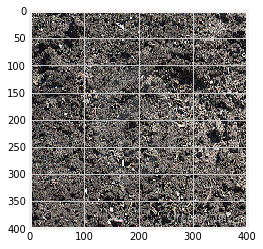

In [139]:
plt.imshow(X[9])


In [143]:
y = np.array(train)
y.shape

(19, 2)

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)


In [166]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(400,400,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [167]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 396, 396, 16)      1216      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 198, 198, 16)      0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 198, 198, 16)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 194, 194, 32)      12832     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 97, 97, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 97, 97, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 93, 93, 64)        51264     
__________

In [168]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [169]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)


ValueError: Error when checking target: expected conv2d_12 to have 4 dimensions, but got array with shape (17, 2)

In [170]:
X_test.shape

(2, 400, 400, 3)

In [171]:
X_train.shape

(17, 400, 400, 3)